<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML_BestFitSlope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear regression excersises

In [ ]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

In [ ]:
xs = np.array([1, 2, 3, 4, 5, 6], dtype = np.float64)
ys = np.array([5, 4, 6, 5, 6, 7], dtype = np.float64)

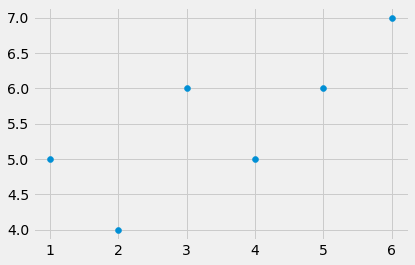

In [ ]:
plt.scatter(xs, ys)
plt.show()

##Linear regression formula

In [ ]:
def best_fit_slope(xs, ys):
  numerator = (np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)
  denominator = np.mean(xs)**2 - np.mean(xs**2)
  m = numerator/denominator
  return m

In [ ]:
m = best_fit_slope(xs, ys)
m

0.42857142857142866

In [ ]:
def best_fit_int(xs, ys, m):
  b = np.mean(ys) - m*(np.mean(xs))
  return b

In [ ]:
b = best_fit_int(xs, ys, m)
b

4.0

In [ ]:
def best_fit_line(xs, ys):
  numerator = (np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)
  denominator = np.mean(xs)**2 - np.mean(xs**2)
  m = numerator/denominator
  b = np.mean(ys) - m*(np.mean(xs))

  y = [(m*x + b) for x in xs]
  # for x in xs:
    # y.append(m*x +b)
  
  return y

In [ ]:
regression_line = best_fit_line(xs, ys)
regression_line

[4.428571428571429,
 4.857142857142858,
 5.2857142857142865,
 5.714285714285714,
 6.142857142857143,
 6.571428571428572]

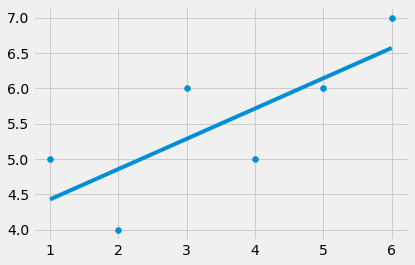

In [ ]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

##Prediction

In [ ]:
predict_x = 8
predict_y = m*predict_x + b
predict_y

7.428571428571429

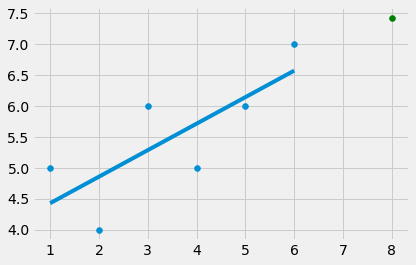

In [ ]:
plt.scatter(predict_x, predict_y, color='g')
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

##R squared - how good is the best fit line? 
coefficient of determination

In [ ]:
def squared_error(ys_original, ys_line):
  return sum((ys_line - ys_original)**2)

In [ ]:
def coef_of_det(ys_original, ys_line):
  y_mean_line = [mean(ys_original) for y in ys_original]
  squared_error_regr = squared_error(ys_original, ys_line)
  squared_error_y_mean = squared_error(ys_original, y_mean_line)
  return 1 - (squared_error_regr/squared_error_y_mean)

In [ ]:
r_squared = coef_of_det(ys, regression_line)
r_squared 

0.5844155844155845

##Testing assumptions

In [ ]:
import random

In [ ]:
def create_dataset(n_samples, variance, step = 2, correlation = 'neg'):
  val = 1
  ys = []
  for i in range(n_samples):
    y = val + random.randrange(-variance, variance)
    ys.append(y)
    # if correlation and correlation == 'pos':
    if correlation == 'pos':
      val += step
    # elif correlation and correlation == 'neg':
    elif correlation == 'neg':
      val -= step
  xs = [i for i in range(len(ys))]

  return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

In [ ]:
xs, ys = create_dataset(40, 40, 2, correlation = 'pos')
xs, ys

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39.]),
 array([ 15., -36., -17., -26.,   8.,  18.,  15.,  47.,  20.,  55.,   4.,
         42.,   1.,  19.,  68.,  -1.,  70.,  16.,  75.,  20.,  64.,  72.,
         50.,  84.,  68.,  32.,  50.,  28.,  23.,  55.,  68.,  53.,  30.,
         27.,  95.,  68.,  57.,  77.,  64., 108.]))

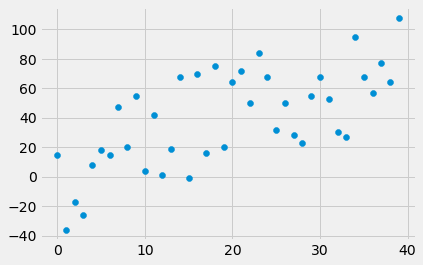

In [ ]:
plt.scatter(xs, ys)
plt.show()

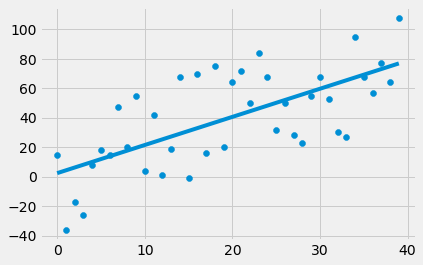

In [ ]:
regression_line = best_fit_line(xs, ys)
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [ ]:
r_squared = coef_of_det(ys, regression_line)
r_squared

0.4547197984416167